https://colab.research.google.com/github/yukinaga/gnn/blob/main/section_2/02_geometric_basic.ipynb#scrollTo=VT2LUUkys9Zf

In [20]:
pip list

Package                       Version
----------------------------- ---------------
alabaster                     0.7.12
anaconda-client               1.11.1
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asn1crypto                    1.5.1
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
black 

In [1]:
from torch_geometric.utils import to_networkx
import networkx as nx
import pandas as pd
# from io import StringIO
import matplotlib.pyplot as plt
from pandas import json_normalize
import json

# 取引履歴csvファイルをDataFrameに読み込み
df = pd.read_csv("output.csv")
# valueが空欄のtransactionを削除
df = df.dropna(subset=['value'])
# JSONの列をキーごとに別々の列にして別のDataFrameに
df_json = json_normalize(df['value'].apply(lambda x: json.loads(x)))
# 送金元と送金先のペアを抽出
df = df[['from','to']]
# 送金元と送金先のペアに送金額を横結合
df = pd.concat([df[['from','to']], df_json['hex']], axis=1)
# 送金額ゼロのtransactionを削除
df = df[df['hex'] != '0x00']
# 送金額を16進数(str)から10進数(int)に
df['hex'] = df['hex'].apply(int, base=16)
# 列名変更
df = df.rename({'hex': 'value_dcm'}, axis='columns')
# DataFrame表示
df

,from,to,value_dcm
20,0xBa9c93Ebe04f5AFAA4EF9D9cE546aB1967C2D812,0xA3b9C7474CfE86A81fEA896546BF79A2b3AFE2C0,580475763054951296
21,0x86216890013D0b6564CCAa0f178E9Af244765545,0x028ed2089C6582Fe0507959a6344732fBEd34e03,288570739707075008
22,0x6Cc9397c3B38739daCbfaA68EaD5F5D77Ba5F455,0x321c2288a862f2309eB8d5314a8A3191cA6C4cDB,50963782500000000
25,0x1433fa07Aafd4974Ae7484e5670a9c4e251C3e8c,0x7d164F30f0b6a2ABAE55Adae9645a22268747D61,12000000000000000
34,0x458BdC5Ed0D8073806fE1eb6965681D167054191,0xB9A60416f2dea96C07A9Ab53e35350888D2D67e0,9183200000000000
35,0x70eE51dd8c9C5353B65bF29c74579FE9eF8939c2,0xB9A60416f2dea96C07A9Ab53e35350888D2D67e0,9183200000000000
48,0xd0e18B178ED14F2cEd650653582610e0F3fD7e2f,0x21F308067241B2028503c07bd7cB3751FFab0Fb2,30000000000000000
58,0x12ae548f5eb20686AF4Da14b7cAF5D7Ce54511B1,0x95fF8D3CE9dcB7455BEB7845143bEA84Fe5C4F6f,12000000000
61,0xB15b04874302D89dDFA3486836a58877f11D45C1,0x95fF8D3CE9dcB7455BEB7845143bEA84Fe5C4F6f,10000000000
73,0x2CdA41645F2dBffB852a605E92B185501801FC28,0xfef5eE28A66eb9ad070e913634674C3cb86136Ce,50000000000000000


In [19]:
hex = '0x016345785d8a0000'    
dec = int(hex, 16)       
print (dec)

100000000000000000


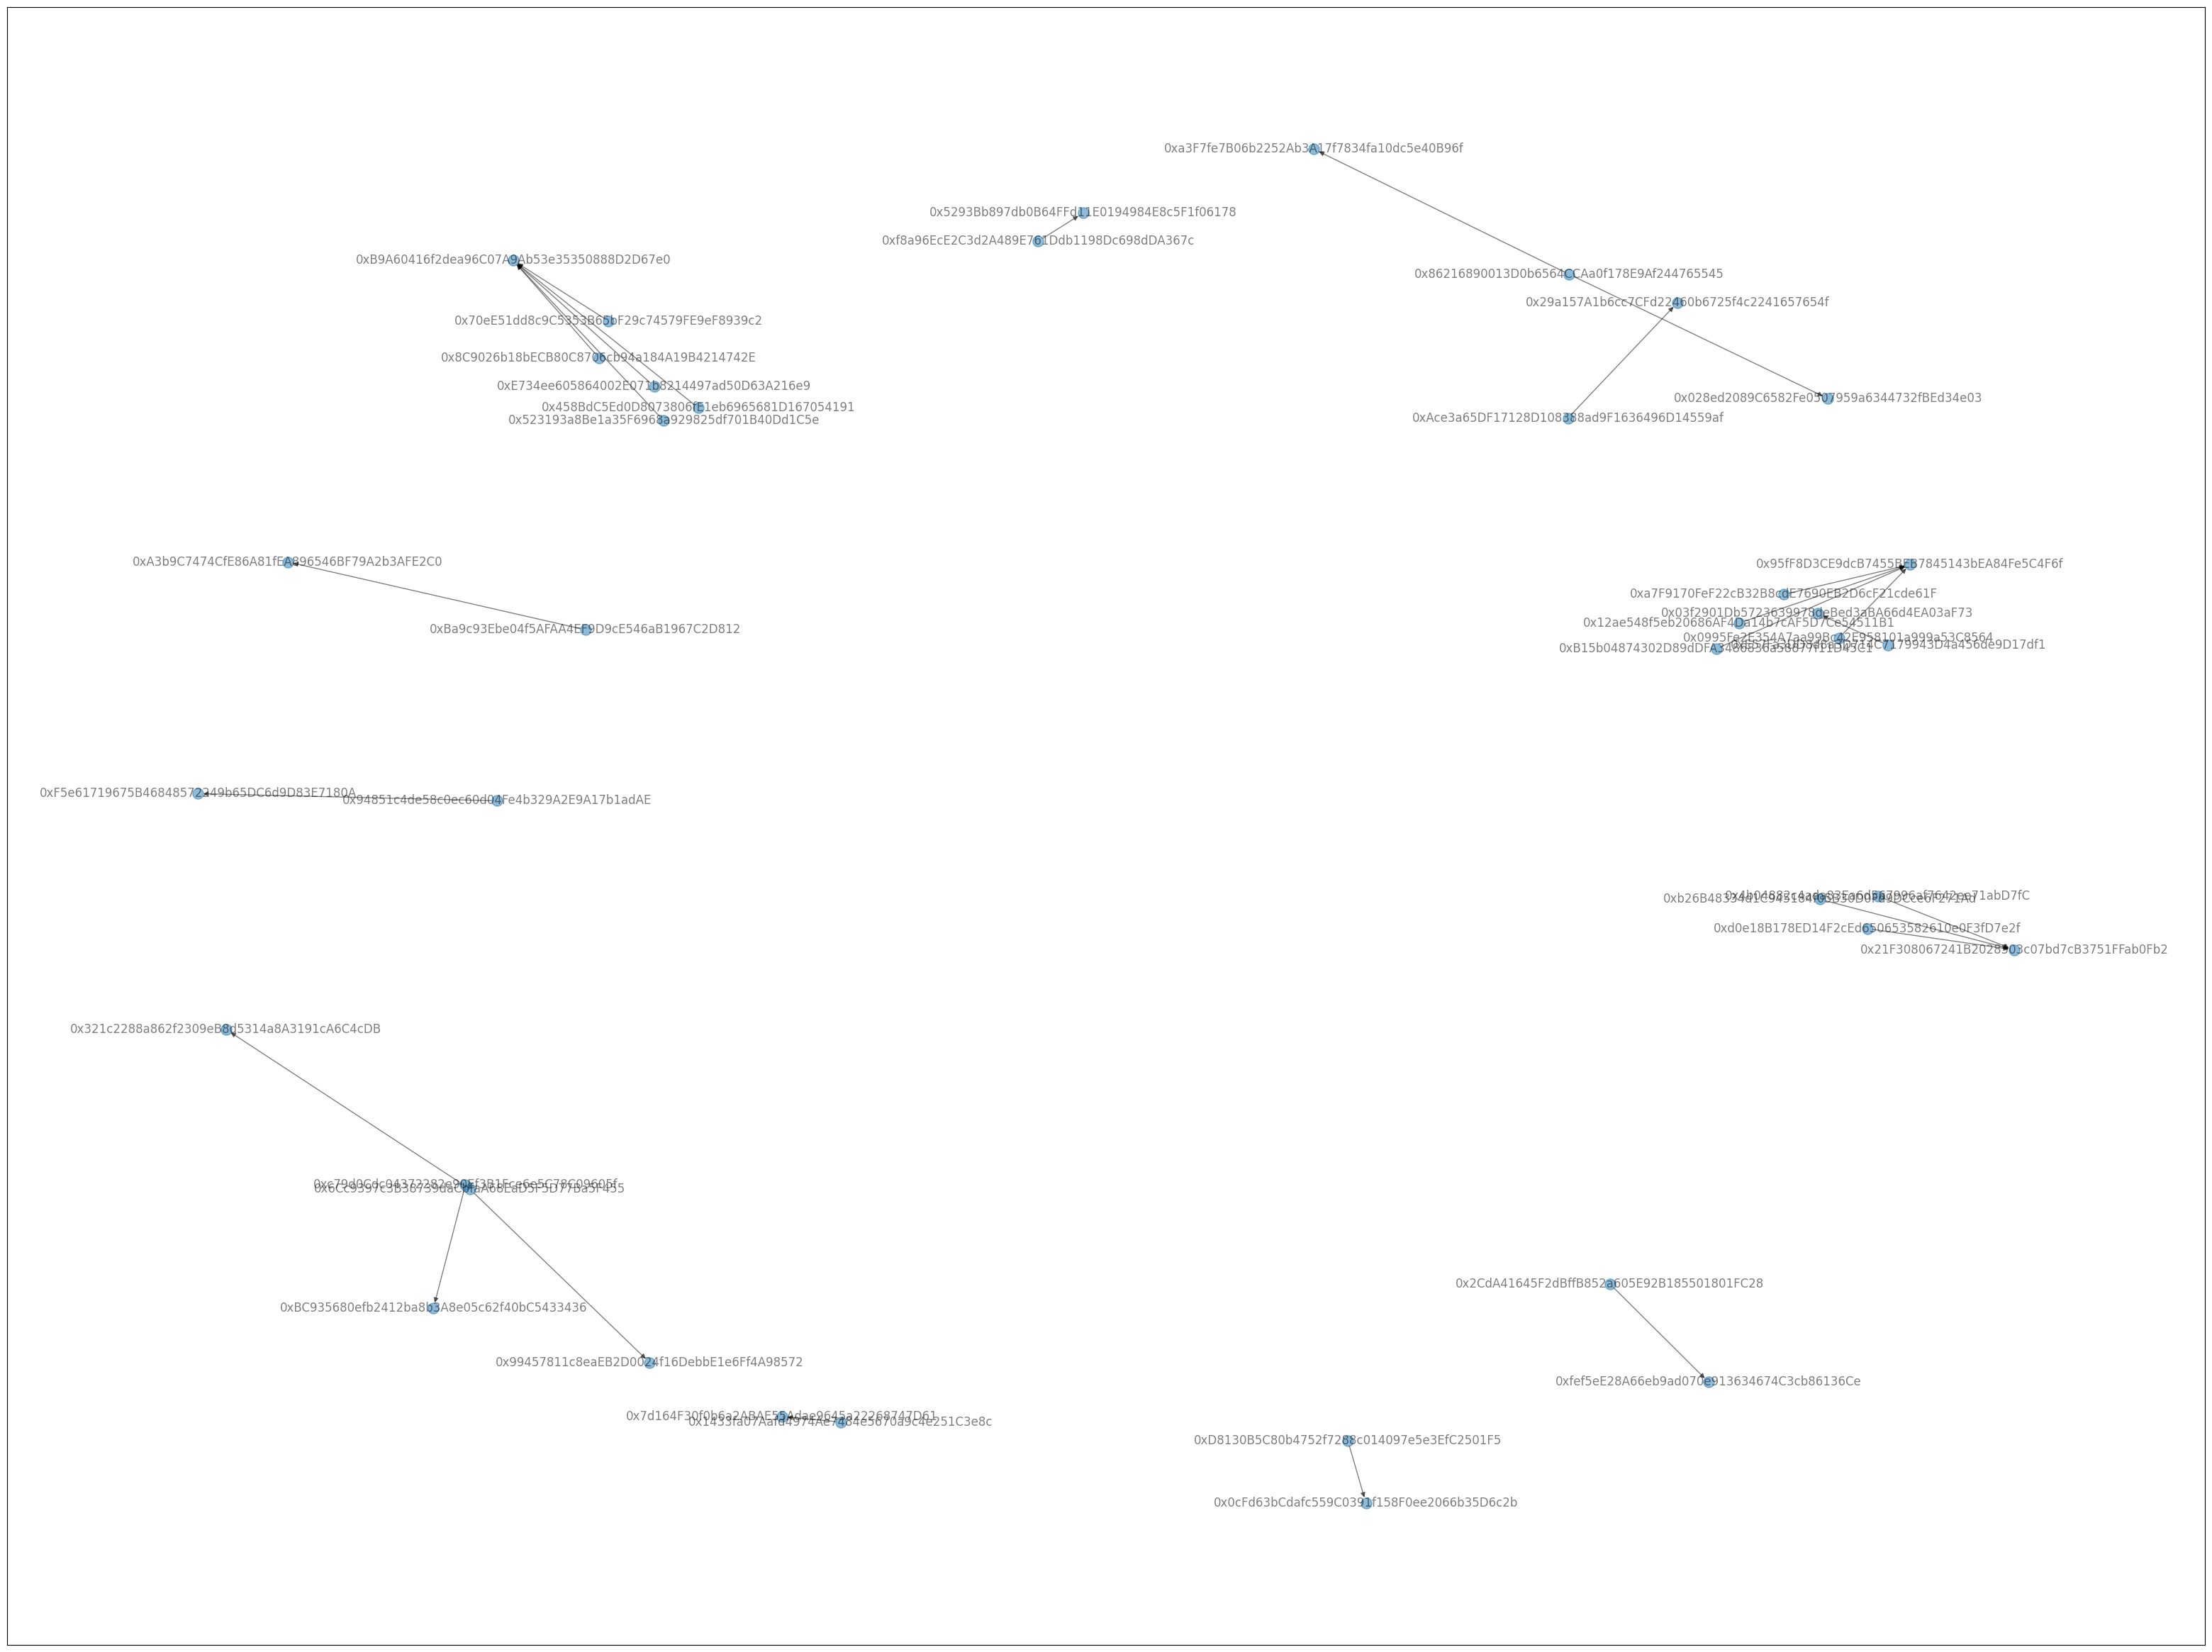

In [2]:
# https://qiita.com/niship2/items/9d7e2b6ab2ca1be18eaf
import matplotlib.pyplot as plt

# 可視化画面のサイズを設定
plt.figure(figsize=(40, 30))
# 可視化ライブラリの仕様に列名を変更
df.columns = ['source','target','value_dcm']
# 可視化ライブラリの仕様にデータ型を変更
df.loc[:,'source'] = df.loc[:, 'source'].astype(str)
df.loc[:,'target'] = df.loc[:, 'target'].astype(str)
df.loc[:,'value_dcm'] = df.loc[:, 'value_dcm'].astype(str)
# 可視化ライブラリにエッジのリストとしてDataFrameを渡す
G = nx.from_pandas_edgelist(df,create_using=nx.DiGraph())
# 可視化の設定を渡して描画
nx.draw_networkx(G,
        alpha=0.5,
        with_labels = True,
        node_size=120) #修正済み
# 画像表示
plt.show()

In [3]:
df

,source,target,value_dcm
20,0xBa9c93Ebe04f5AFAA4EF9D9cE546aB1967C2D812,0xA3b9C7474CfE86A81fEA896546BF79A2b3AFE2C0,580475763054951296
21,0x86216890013D0b6564CCAa0f178E9Af244765545,0x028ed2089C6582Fe0507959a6344732fBEd34e03,288570739707075008
22,0x6Cc9397c3B38739daCbfaA68EaD5F5D77Ba5F455,0x321c2288a862f2309eB8d5314a8A3191cA6C4cDB,50963782500000000
25,0x1433fa07Aafd4974Ae7484e5670a9c4e251C3e8c,0x7d164F30f0b6a2ABAE55Adae9645a22268747D61,12000000000000000
34,0x458BdC5Ed0D8073806fE1eb6965681D167054191,0xB9A60416f2dea96C07A9Ab53e35350888D2D67e0,9183200000000000
35,0x70eE51dd8c9C5353B65bF29c74579FE9eF8939c2,0xB9A60416f2dea96C07A9Ab53e35350888D2D67e0,9183200000000000
48,0xd0e18B178ED14F2cEd650653582610e0F3fD7e2f,0x21F308067241B2028503c07bd7cB3751FFab0Fb2,30000000000000000
58,0x12ae548f5eb20686AF4Da14b7cAF5D7Ce54511B1,0x95fF8D3CE9dcB7455BEB7845143bEA84Fe5C4F6f,12000000000
61,0xB15b04874302D89dDFA3486836a58877f11D45C1,0x95fF8D3CE9dcB7455BEB7845143bEA84Fe5C4F6f,10000000000
73,0x2CdA41645F2dBffB852a605E92B185501801FC28,0xfef5eE28A66eb9ad070e913634674C3cb86136Ce,50000000000000000


In [4]:
from pyvis.network import Network
pyvis_G = Network(directed=True)
pyvis_G.from_nx(G)
pyvis_G.toggle_physics(True)  #修正済み，enable→toggle　html上でレイアウト動かしたくない場合false
pyvis_G.show_buttons()
pyvis_G.show("mygraph.html", notebook=False)

mygraph.html


In [13]:
# エッジの接続
edge_from = [0, 1, 2, 2]  # 接続元
edge_to = [2, 0, 1, 2]  # 接続先

edge_index = torch.tensor([edge_from, edge_to], dtype=torch.long)
 
# 各ノードの特徴量
x_0 = [0, 1]
x_1 = [2, 3]
x_2 = [4, 5]

x = torch.tensor([x_0, x_1, x_2], dtype=torch.float)


# 各ノードのラベル
y_0 = [0]
y_1 = [1]
y_2 = [2]
y = torch.tensor([y_0, y_1, y_2], dtype=torch.float)
 
data = Data(x=x, y=y, edge_index=edge_index)
print(data)

# edge_from = edges['source'].astype(int)
# edge_to = edges['target'].astype(int)
# edge_index = torch.tensor([edge_from, edge_to], dtype=torch.float)
# edge_from = df['source']
# edge_to = df['target']


Data(x=[3, 2], edge_index=[2, 4], y=[3, 1])


In [15]:
def graph_info(data):

    print("ノードの数:", data.num_nodes)
    print("エッジの数:", data.num_edges)
    print("特徴量の数:", data.num_node_features)
    print("無向グラフか？:", data.is_undirected())
    print("孤立したノードが有るか？:", data.has_isolated_nodes())
    print("自己ループがあるか？:", data.has_self_loops())

    print()

    print("キー: ", data.keys)
    print("各ノードの特徴量")
    print(data["x"])
    print("各ノードのラベル")
    print(data["y"])
    print("各エッジ")
    print(data["edge_index"])

In [16]:
graph_info(data)

ノードの数: 3
エッジの数: 4
特徴量の数: 2
無向グラフか？: False
孤立したノードが有るか？: False
自己ループがあるか？: True

キー:  <bound method BaseData.keys of Data(x=[3, 2], edge_index=[2, 4], y=[3, 1])>
各ノードの特徴量
tensor([[0., 1.],
        [2., 3.],
        [4., 5.]])
各ノードのラベル
tensor([[0.],
        [1.],
        [2.]])
各エッジ
tensor([[0, 1, 2, 2],
        [2, 0, 1, 2]])


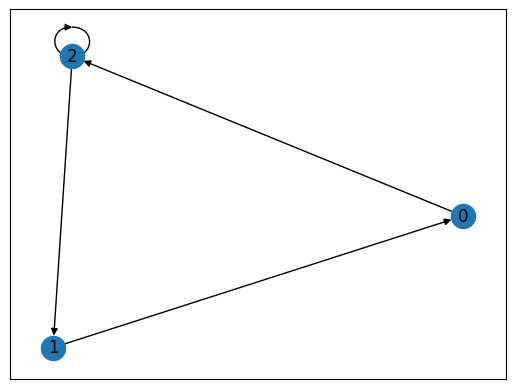

In [17]:
from torch_geometric.utils import to_networkx
import networkx as nx

nxg = to_networkx(data)  # networkxのグラフに変換
nx.draw_networkx(nxg, with_labels=True) #修正済み
# nx.draw(nxg)　#これだとエラー

## karate club

In [18]:
from torch_geometric.datasets import KarateClub

karate_dataset = KarateClub()
karate_data = karate_dataset[0]  # 最初のグラフ

In [19]:
graph_info(karate_data)

ノードの数: 34
エッジの数: 156
特徴量の数: 34
無向グラフか？: True
孤立したノードが有るか？: False
自己ループがあるか？: False

キー:  <bound method BaseData.keys of Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])>
各ノードの特徴量
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])
各ノードのラベル
tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])
各エッジ
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22

In [ ]:
import matplotlib.pyplot as plt

karate_nx = to_networkx(karate_data)  # networkxのグラフに変換

plt.figure(figsize=(12, 10))
# nx.draw(karate_nx,
nx.draw_networkx(karate_nx,
        node_color = karate_data.y,
        alpha=0.5,
        cmap=plt.cm.brg,
        with_labels = True,
        node_size=500)
plt.show()

## Cora

In [20]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root="/tmp/Cora", name="Cora")
data = dataset[0]

In [21]:
print(data)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [22]:
graph_info(data)

ノードの数: 2708
エッジの数: 10556
特徴量の数: 1433
無向グラフか？: True
孤立したノードが有るか？: False
自己ループがあるか？: False

キー:  <bound method BaseData.keys of Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])>
各ノードの特徴量
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
各ノードのラベル
tensor([3, 4, 4,  ..., 3, 3, 3])
各エッジ
tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [ 633, 1862, 2582,  ...,  598, 1473, 2706]])


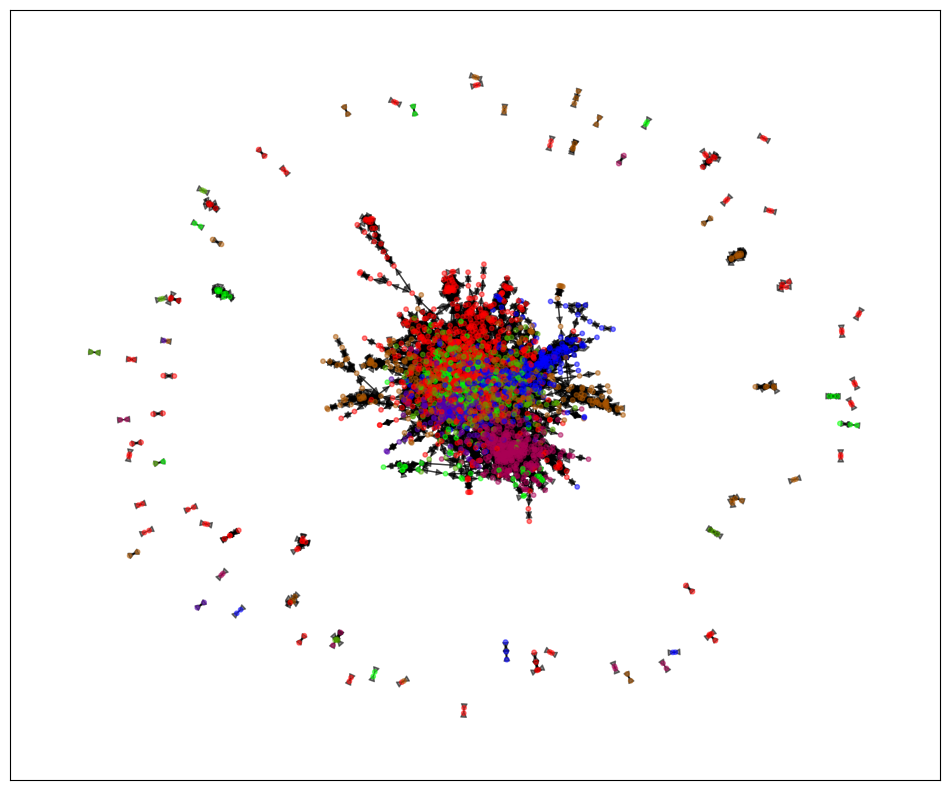

In [23]:
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt

data_nx = to_networkx(data)  # networkxのグラフに変換

plt.figure(figsize=(12, 10))
nx.draw_networkx(data_nx,
        node_color = data.y,
        alpha=0.5,
        cmap=plt.cm.brg,
        with_labels = False,
        node_size=10)
plt.show()

## GCN simple

In [24]:
import torch
import torch.nn as nn
from torch_geometric.nn import GCNConv

class GCN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 32)
        self.relu = nn.ReLU()  # ReLU
        self.conv2 = GCNConv(32, dataset.num_classes)

    def forward(self, data):
        x = data.x
        edge_index = data.edge_index

        x = self.conv1(x, edge_index)
        x = self.relu(x)
        x = self.conv2(x, edge_index)

        return x

net = GCN()

## 学習

In [25]:

from torch import optim

# data = data.cuda()  # GPU対応

# 交差エントロピー誤差関数
loss_fnc = nn.CrossEntropyLoss()

# 最適化アルゴリズム
optimizer = optim.Adam(net.parameters())

net.train()  # 訓練モード
for epoch in range(200):
    optimizer.zero_grad()  # ①勾配の初期化
    out = net(data)  # ②順伝播により予測値を得る
    loss = loss_fnc(out[data.train_mask], data.y[data.train_mask])  # ③予測値と正解値から誤差を計算

    loss.backward()  # ④誤差からバックプロパゲーションにより勾配を計算
    optimizer.step()  # ⑤最適化アルゴリズムによりパラメータを更新

## テスト用ノードでモデルを評価

In [26]:
net.eval()  # 評価モード
pred = net(data).argmax(dim=1)
correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
accuracy = int(correct) / int(data.test_mask.sum())
print("正解率:", str(accuracy*100) + "%")

正解率: 77.4%


## GCN

In [34]:
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader

In [35]:
dataset = TUDataset(root="/tmp/MUTAG", name="MUTAG")

dataset = dataset.shuffle()  # データセットをシャッフル
dataset_train = dataset[:140]  # 訓練用データセット
dataset_test = dataset[140:]  # テスト用データセット

batch_size = 64  # バッチサイズ
loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
loader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

In [50]:
print(dataset)

MUTAG(188)


GCNのモデルを構築します。
層の実装には、GCNConv()を利用しますが、以下のように設定します。

GCNConv(入力の特徴量数, 出力の特徴量数)
https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv
今回は、全結合層の前にニューロンをランダムに削除する「ドロップアウト」を導入します。
ドロップアウトを導入することで、未知のデータに対してより頑強になるようにモデルを訓練することができます。
https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html

In [36]:
import torch
import torch.nn as nn
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool

In [37]:
n_h = 64  # 中間層における特徴量の数

class GCN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, n_h)
        self.conv2 = GCNConv(n_h, n_h)
        self.conv3 = GCNConv(n_h, n_h)
        self.fc = nn.Linear(n_h, dataset.num_classes)  # 全結合層

        self.relu = nn.ReLU()  # ReLU
        self.dropout = nn.Dropout(p=0.5)  # ドロップアウト:(p=ドロップアウト率)

    def forward(self, data):
        x = data.x
        edge_index = data.edge_index
        batch = data.batch

        x = self.conv1(x, edge_index)
        x = self.relu(x)
        x = self.conv2(x, edge_index)
        x = self.relu(x)
        x = self.conv3(x, edge_index)

        # 全てのノードで各特徴量の平均をとる
        x = global_mean_pool(x, batch)  # (バッチサイズ, 特徴量の数)に変換

        x = self.dropout(x)
        x = self.fc(x)
        
        return x

net = GCN()
# net.cuda()  #GPU対応

global_mean_pool()は、「ノードの次元」で各特徴量の平均をとることにより、データを(バッチサイズ, 特徴量の数)に変換します。

## 学習

In [38]:
def eval(loader):
    correct = 0  # 正解数

    for data in loader:
#         data = data.cuda()  # GPU対応
        out = net(data)  
        pred = out.argmax(dim=1)
        correct += int((pred == data.y).sum())

    return correct/len(loader.dataset)  # 正解率

from torch import optim

# 交差エントロピー誤差関数
loss_fnc = nn.CrossEntropyLoss()

# 最適化アルゴリズム
optimizer = optim.Adam(net.parameters())

for epoch in range(200):
    # 訓練
    net.train()  # 訓練モード
    for data in loader_train: 
#         data = data.cuda()  # GPU対応

        optimizer.zero_grad()  # ①勾配の初期化
        out = net(data)  # ②順伝播により予測値を得る
        loss = loss_fnc(out, data.y)  # ③予測値と正解値から誤差を計算

        loss.backward()  # ④誤差からバックプロパゲーションにより勾配を計算
        optimizer.step()  # ⑤最適化アルゴリズムによりパラメータを更新

    # 評価
    net.eval()  # 評価モード
    acc_train = eval(loader_train)
    acc_test = eval(loader_test)
    print("Epoch:", epoch,
          "acc_train:", str(acc_train*100) + "%",
          "acc_test:", str(acc_test*100) + "%")

Epoch: 0 acc_train: 67.14285714285714% acc_test: 64.58333333333334%
Epoch: 1 acc_train: 67.14285714285714% acc_test: 64.58333333333334%
Epoch: 2 acc_train: 67.14285714285714% acc_test: 64.58333333333334%
Epoch: 3 acc_train: 67.14285714285714% acc_test: 64.58333333333334%
Epoch: 4 acc_train: 67.14285714285714% acc_test: 64.58333333333334%
Epoch: 5 acc_train: 67.14285714285714% acc_test: 64.58333333333334%
Epoch: 6 acc_train: 67.14285714285714% acc_test: 64.58333333333334%
Epoch: 7 acc_train: 67.14285714285714% acc_test: 64.58333333333334%
Epoch: 8 acc_train: 67.14285714285714% acc_test: 64.58333333333334%
Epoch: 9 acc_train: 67.14285714285714% acc_test: 64.58333333333334%
Epoch: 10 acc_train: 67.14285714285714% acc_test: 64.58333333333334%
Epoch: 11 acc_train: 67.14285714285714% acc_test: 64.58333333333334%
Epoch: 12 acc_train: 67.14285714285714% acc_test: 64.58333333333334%
Epoch: 13 acc_train: 67.14285714285714% acc_test: 64.58333333333334%
Epoch: 14 acc_train: 67.14285714285714% acc_

Epoch: 125 acc_train: 79.28571428571428% acc_test: 72.91666666666666%
Epoch: 126 acc_train: 80.0% acc_test: 72.91666666666666%
Epoch: 127 acc_train: 80.0% acc_test: 70.83333333333334%
Epoch: 128 acc_train: 80.0% acc_test: 70.83333333333334%
Epoch: 129 acc_train: 80.0% acc_test: 70.83333333333334%
Epoch: 130 acc_train: 80.0% acc_test: 70.83333333333334%
Epoch: 131 acc_train: 79.28571428571428% acc_test: 72.91666666666666%
Epoch: 132 acc_train: 78.57142857142857% acc_test: 72.91666666666666%
Epoch: 133 acc_train: 79.28571428571428% acc_test: 72.91666666666666%
Epoch: 134 acc_train: 79.28571428571428% acc_test: 70.83333333333334%
Epoch: 135 acc_train: 79.28571428571428% acc_test: 70.83333333333334%
Epoch: 136 acc_train: 80.0% acc_test: 70.83333333333334%
Epoch: 137 acc_train: 80.0% acc_test: 70.83333333333334%
Epoch: 138 acc_train: 79.28571428571428% acc_test: 72.91666666666666%
Epoch: 139 acc_train: 79.28571428571428% acc_test: 72.91666666666666%
Epoch: 140 acc_train: 80.0% acc_test: 70.

## モデルの評価

In [39]:
net.eval()  # 評価モード
acc_test = eval(loader_test)
print("accuracy:", str(acc_test*100) + "%")

accuracy: 70.83333333333334%


## GAT

### GATの実装
Graph Attention Networks（GAT）を実装します。 多数のグラフを持つデータセットを訓練データに使い、ミニバッチ法により学習を行います。

In [40]:
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader

dataset = TUDataset(root="/tmp/MUTAG", name="MUTAG")

dataset = dataset.shuffle()  # データセットをシャッフル
dataset_train = dataset[:140]  # 訓練用データセット
dataset_test = dataset[140:]  # テスト用データセット

batch_size = 64  # バッチサイズ
loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
loader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

## モデルの構築

In [41]:
import torch
import torch.nn as nn
from torch_geometric.nn import GATConv
from torch_geometric.nn import global_mean_pool

n_h = 64  # 中間層における特徴量の数
n_head = 32

class GAT(nn.Module):
    def __init__(self):
        super().__init__()
        self.gat1 = GATConv(dataset.num_node_features,
                            n_h,
                            heads=n_head)
        self.gat2 = GATConv(n_h*n_head,
                            n_h,
                            heads=n_head)
        self.fc = nn.Linear(n_h*n_head, dataset.num_classes)  # 全結合層

        self.relu = nn.ReLU()  # ReLU
        self.dropout = nn.Dropout(p=0.5)  # ドロップアウト:(p=ドロップアウト率)

    def forward(self, data):
        x = data.x
        edge_index = data.edge_index
        batch = data.batch

        x = self.gat1(x, edge_index)
        x = self.relu(x)
        x = self.gat2(x, edge_index)
        x = self.relu(x)

        # 全てのノードで各特徴量の平均をとる
        x = global_mean_pool(x, batch)  # (バッチサイズ, 特徴量の数)に変換

        x = self.dropout(x)
        x = self.fc(x)
        
        return x

net = GAT()
# net.cuda()  #GPU対応

## 学習

### モデル評価用関数

In [42]:
def eval(loader):
    correct = 0  # 正解数

    for data in loader:
#         data = data.cuda()  # GPU対応
        out = net(data)  
        pred = out.argmax(dim=1)
        correct += int((pred == data.y).sum())

    return correct/len(loader.dataset)  # 正解率

In [43]:
from torch import optim

# 交差エントロピー誤差関数
loss_fnc = nn.CrossEntropyLoss()

# 最適化アルゴリズム
optimizer = optim.Adam(net.parameters())

for epoch in range(200):
    # 訓練
    net.train()  # 訓練モード
    for data in loader_train: 
#         data = data.cuda()  # GPU対応

        optimizer.zero_grad()  # ①勾配の初期化
        out = net(data)  # ②順伝播により予測値を得る
        loss = loss_fnc(out, data.y)  # ③予測値と正解値から誤差を計算

        loss.backward()  # ④誤差からバックプロパゲーションにより勾配を計算
        optimizer.step()  # ⑤最適化アルゴリズムによりパラメータを更新

    # 評価
    net.eval()  # 評価モード
    acc_train = eval(loader_train)
    acc_test = eval(loader_test)
    print("Epoch:", epoch,
          "acc_train:", str(acc_train*100) + "%",
          "acc_test:", str(acc_test*100) + "%")

Epoch: 0 acc_train: 65.0% acc_test: 70.83333333333334%
Epoch: 1 acc_train: 65.0% acc_test: 70.83333333333334%
Epoch: 2 acc_train: 65.0% acc_test: 70.83333333333334%
Epoch: 3 acc_train: 65.0% acc_test: 70.83333333333334%
Epoch: 4 acc_train: 65.0% acc_test: 70.83333333333334%
Epoch: 5 acc_train: 65.0% acc_test: 70.83333333333334%
Epoch: 6 acc_train: 65.0% acc_test: 70.83333333333334%
Epoch: 7 acc_train: 65.0% acc_test: 70.83333333333334%
Epoch: 8 acc_train: 65.71428571428571% acc_test: 70.83333333333334%
Epoch: 9 acc_train: 67.14285714285714% acc_test: 70.83333333333334%
Epoch: 10 acc_train: 71.42857142857143% acc_test: 77.08333333333334%
Epoch: 11 acc_train: 72.85714285714285% acc_test: 75.0%
Epoch: 12 acc_train: 72.85714285714285% acc_test: 75.0%
Epoch: 13 acc_train: 70.0% acc_test: 79.16666666666666%
Epoch: 14 acc_train: 70.0% acc_test: 79.16666666666666%
Epoch: 15 acc_train: 71.42857142857143% acc_test: 79.16666666666666%
Epoch: 16 acc_train: 72.85714285714285% acc_test: 77.083333333

Epoch: 136 acc_train: 80.0% acc_test: 83.33333333333334%
Epoch: 137 acc_train: 75.0% acc_test: 81.25%
Epoch: 138 acc_train: 79.28571428571428% acc_test: 83.33333333333334%
Epoch: 139 acc_train: 82.14285714285714% acc_test: 77.08333333333334%
Epoch: 140 acc_train: 80.0% acc_test: 75.0%
Epoch: 141 acc_train: 80.0% acc_test: 77.08333333333334%
Epoch: 142 acc_train: 79.28571428571428% acc_test: 83.33333333333334%
Epoch: 143 acc_train: 77.85714285714286% acc_test: 83.33333333333334%
Epoch: 144 acc_train: 80.0% acc_test: 79.16666666666666%
Epoch: 145 acc_train: 79.28571428571428% acc_test: 79.16666666666666%
Epoch: 146 acc_train: 81.42857142857143% acc_test: 79.16666666666666%
Epoch: 147 acc_train: 81.42857142857143% acc_test: 79.16666666666666%
Epoch: 148 acc_train: 80.71428571428572% acc_test: 81.25%
Epoch: 149 acc_train: 80.0% acc_test: 83.33333333333334%
Epoch: 150 acc_train: 80.0% acc_test: 83.33333333333334%
Epoch: 151 acc_train: 81.42857142857143% acc_test: 77.08333333333334%
Epoch: 1

## モデルの評価

In [ ]:
net.eval()  # 評価モード
acc_test = eval(loader_test)
print("accuracy:", str(acc_test*100) + "%")